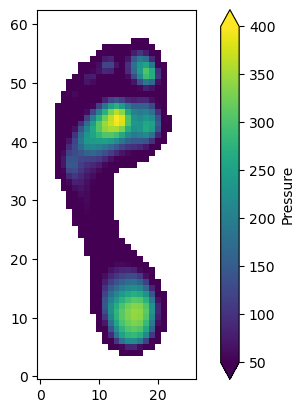

In [7]:
# https://github.com/0todd0000/mun104
# 背景改成白色，脚 红色-蓝色
import tables 
import matplotlib.pyplot as plt

file_name = './data/MUN104L.h5' 
with tables.open_file(file_name, 'r') as h:
	I = h.root.I.read()
    
# NaN replace 0，show white
I_masked = np.ma.masked_where(I == 0, I)

# legend range
vmin, vmax = 50, 400

# plt.imshow(I, origin='lower', interpolation='nearest')
# plt.show()

plt.imshow(I_masked, origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
plt.colorbar(label='Pressure', extend='both', ticks=np.linspace(vmin, vmax, num=8))  # 添加颜色条，设置标签和刻度
plt.show()


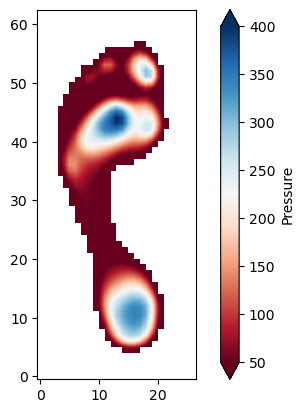

In [11]:
# interpolation
# 'none'：不进行插值，显示原始图像。
# 'nearest'：最近邻插值，不进行平滑处理，图像会显得像素化。
# 'bilinear'：双线性插值，对图像进行线性平滑处理。
# 'bicubic'：双三次插值，对图像进行三次平滑处理。
# 'spline16'：16阶样条插值，对图像进行高阶平滑处理。
# 'spline36'：36阶样条插值，对图像进行高阶平滑处理。
# 'hanning'：Hanning窗插值，对图像进行平滑处理。
# 'hamming'：Hamming窗插值，对图像进行平滑处理。
# 'hermite'：Hermite插值，对图像进行平滑处理。
# 'kaiser'：Kaiser窗插值，对图像进行平滑处理。
# 'quadric'：二次插值，对图像进行平滑处理。
# 'catrom'：Catmull-Rom插值，对图像进行平滑处理。
# 'gaussian'：高斯插值，对图像进行平滑处理。
# 'bessel'：贝塞尔插值，对图像进行平滑处理。
# 'mitchell'：Mitchell-Netravali插值，对图像进行平滑处理。
# 'sinc'：Sinc插值，对图像进行平滑处理.
# 'lanczos'：Lanczos插值，对图像进行平滑处理.
import tables
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# open HDF5 file
file_name = './data/MUN104L.h5'
with tables.open_file(file_name, 'r') as h:
    I = h.root.I.read()

I_masked = np.ma.masked_where(I == 0, I)

cmap = plt.get_cmap('RdBu')

vmin, vmax = 50, 400

plt.imshow(I_masked, origin='lower', cmap=cmap, interpolation='bilinear', vmin=vmin, vmax=vmax)  # 修改此处的插值方法
plt.colorbar(label='Pressure', extend='both', ticks=np.linspace(vmin, vmax, num=8))  # 添加颜色条，设置标签和刻度
plt.show()


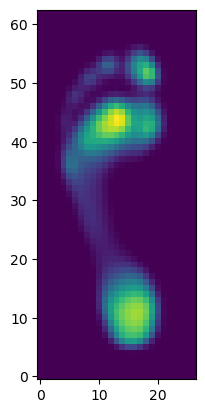

In [9]:
# 背景改成白色，脚 红色-蓝色
import tables 
import matplotlib.pyplot as plt

file_name = './data/MUN104L.h5' 
with tables.open_file(file_name, 'r') as h:
	I = h.root.I.read()
plt.imshow(I, origin='lower', interpolation='nearest')
plt.show()


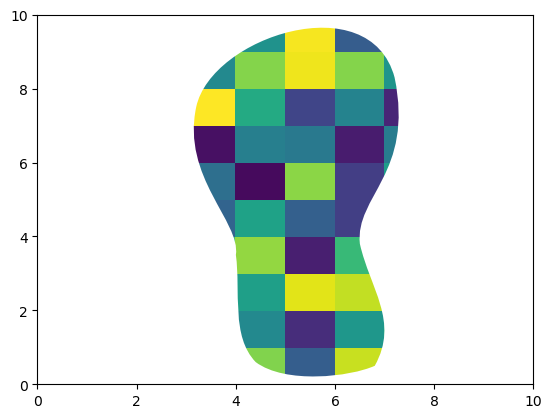

In [12]:
# https://stackoverflow.com/questions/34887917/creating-a-pressure-heatmap-of-a-foot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path

# Create a heat map with some fake data
ax = plt.subplot(111)
plt.pcolor(np.random.random((10,10)))

# Define a path that is a foot shape
foot_verts = [(3.2, 7.5),                         #Start point
             (2.9, 5.6), (4.1, 4.4), (4, 3.5),    #Cubic Bezier controls and end point
             (4.1,2.5), (3.9, 1.3), (4.4, 0.6),
             (5, 0), (6.3, 0.2), (6.8, 0.5),
             (7.3, 1.7), (6.7, 2.6), (6.5, 3.8),
             (6.4, 5.1), (7.6, 5.7), (7.2, 8.3),
             (6.7, 10.8), (3.5, 9.4), (3.2, 7.5)]

foot_codes = [Path.MOVETO,
              Path.CURVE4, Path.CURVE4, Path.CURVE4,
              Path.CURVE4, Path.CURVE4, Path.CURVE4,
              Path.CURVE4, Path.CURVE4, Path.CURVE4,
              Path.CURVE4, Path.CURVE4, Path.CURVE4,
              Path.CURVE4, Path.CURVE4, Path.CURVE4,
              Path.CURVE4, Path.CURVE4, Path.CURVE4]
# Define a path that is the same size as the plot area
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax_verts = [(xlim[0],ylim[0]),
            (xlim[0],ylim[1]),
            (xlim[1],ylim[1]),
            (xlim[1],ylim[0]),
            (xlim[0],ylim[0])]

ax_codes = [Path.MOVETO,
            Path.LINETO,
            Path.LINETO,
            Path.LINETO,
            Path.LINETO
            ]

#Create a patch that is the plot area minus the foot shape and add to the plot
path = Path(ax_verts + foot_verts, ax_codes + foot_codes)
patch = patches.PathPatch(path, facecolor='white', edgecolor='none')
ax.add_patch(patch)

plt.show()

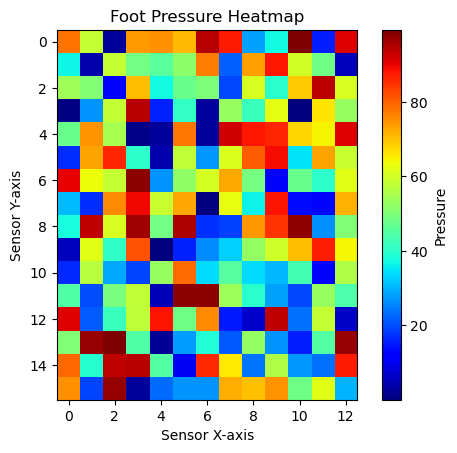

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据，假设数据保存在一个16x13的矩阵中
# 实际使用时，你可以替换为实际的传感器数据
pressure_data = np.random.rand(16, 13) * 100  # 生成0到100之间的随机压力值

# 创建一个热力图
plt.imshow(pressure_data, cmap='jet', interpolation='nearest')

# 添加颜色条，以便解释颜色代表的压力值
plt.colorbar(label='Pressure')

# 设置图表标题和标签
plt.title('Foot Pressure Heatmap')
plt.xlabel('Sensor X-axis')
plt.ylabel('Sensor Y-axis')

# 显示热力图
plt.show()


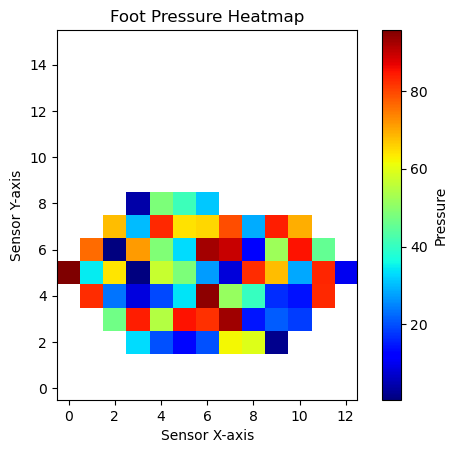

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据，假设这就是你的64个传感器的数据
pressure_values = np.random.rand(64) * 100  # 生成0到100之间的随机压力值

# 假设这是你的64个传感器在16x13网格中的位置（行, 列）
sensor_positions = [
    (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9),
    (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10),
    (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11),
    (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12),
    (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11),
    (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10),
    (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9)
]

# 创建一个16x13的空矩阵，并将所有值设置为NaN，这样未使用的网格不会显示颜色
pressure_matrix = np.full((16, 13), np.nan)

# 将传感器数据放入相应的位置
for (pos, value) in zip(sensor_positions, pressure_values):
    pressure_matrix[pos] = value

# 创建热力图
plt.imshow(pressure_matrix, cmap='jet', interpolation='nearest', origin='lower')

# 添加颜色条，以便解释颜色代表的压力值
plt.colorbar(label='Pressure')

# 设置图表标题和标签
plt.title('Foot Pressure Heatmap')
plt.xlabel('Sensor X-axis')
plt.ylabel('Sensor Y-axis')

# 显示热力图
plt.show()


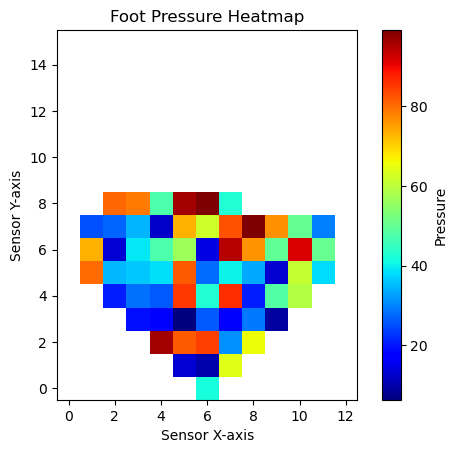

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据，假设这就是你的64个传感器的数据
pressure_values = np.random.rand(64) * 100  # 生成0到100之间的随机压力值

# 假设这是你的64个传感器在16x13网格中的位置（行, 列），此位置对应竖直鞋垫形状
sensor_positions = [
    (0, 6), (1, 5), (1, 6), (1, 7),
    (2, 4), (2, 5), (2, 6), (2, 7), (2, 8),
    (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9),
    (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10),
    (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11),
    (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11),
    (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11),
    (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9),
    (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8),
    (10, 4), (10, 5), (10, 6), (10, 7),
    (11, 5), (11, 6)
]

# 创建一个16x13的空矩阵，并将所有值设置为NaN，这样未使用的网格不会显示颜色
pressure_matrix = np.full((16, 13), np.nan)

# 将传感器数据放入相应的位置
for (pos, value) in zip(sensor_positions, pressure_values):
    pressure_matrix[pos] = value

# 创建热力图
plt.imshow(pressure_matrix, cmap='jet', interpolation='nearest', origin='lower')

# 添加颜色条，以便解释颜色代表的压力值
plt.colorbar(label='Pressure')

# 设置图表标题和标签
plt.title('Foot Pressure Heatmap')
plt.xlabel('Sensor X-axis')
plt.ylabel('Sensor Y-axis')

# 显示热力图
plt.show()


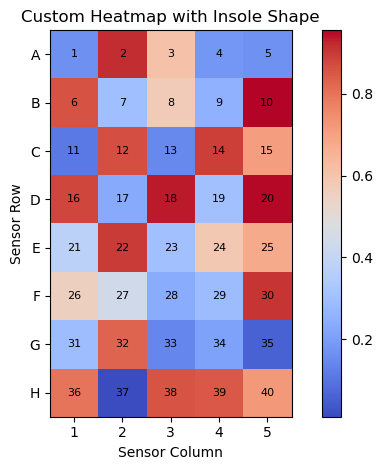

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 假设这是鞋垫上的传感器布局（8x5矩阵）
sensor_layout = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25],
    [26, 27, 28, 29, 30],
    [31, 32, 33, 34, 35],
    [36, 37, 38, 39, 40]
])

# 假设这是你采集到的传感器数据，也是一个8x5的矩阵
sensor_data = np.random.rand(8, 5)  # 这里用随机数据代替

# 绘制Heatmap，按照鞋垫布局对应显示
plt.imshow(sensor_data, cmap='coolwarm', interpolation='nearest')

# 显示对应的传感器编号或位置
for i in range(sensor_layout.shape[0]):
    for j in range(sensor_layout.shape[1]):
        plt.text(j, i, str(sensor_layout[i, j]), ha='center', va='center', color='black', fontsize=8)

plt.title('Custom Heatmap with Insole Shape')
plt.colorbar()  # 显示颜色条
plt.xticks(range(sensor_data.shape[1]), ['1', '2', '3', '4', '5'])  # 设定x轴刻度
plt.yticks(range(sensor_data.shape[0]), ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])  # 设定y轴刻度
plt.xlabel('Sensor Column')
plt.ylabel('Sensor Row')
plt.tight_layout()
plt.show()


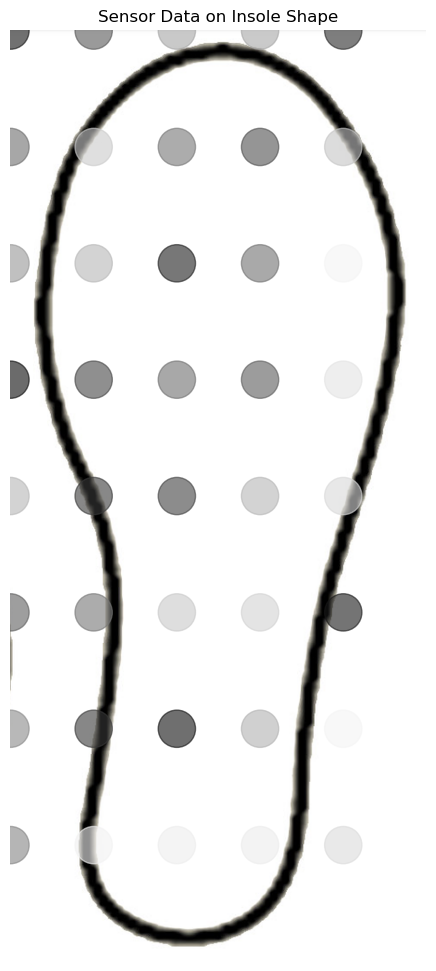

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 假设这是你采集到的传感器数据，一个8x5的矩阵
sensor_data = np.random.rand(8, 5)  # 这里用随机数据代替

# 加载鞋垫的形状图像
insole_image = Image.open('insole_shape.png')  # 替换为你的鞋垫形状图片路径
insole_image = insole_image.convert('RGB')

# 获取鞋垫形状图像的大小
width, height = insole_image.size

# 创建一个与鞋垫形状大小相同的画布
fig, ax = plt.subplots(figsize=(width/100, height/100))

# 显示鞋垫形状图像
ax.imshow(insole_image)

# 定义每个传感器数据在鞋垫形状上的位置和大小
sensor_size = 20  # 传感器数据点的大小

# 将传感器数据绘制在鞋垫形状图像上
for i in range(sensor_data.shape[0]):
    for j in range(sensor_data.shape[1]):
        # 计算每个传感器数据点的位置
        x = j * (width / sensor_data.shape[1])
        y = i * (height / sensor_data.shape[0])
        
        # 将数据点映射到0-1的灰度值范围
        intensity = sensor_data[i, j]
        
        # 设置灰度颜色
        color = (intensity, intensity, intensity)
        
        # 在鞋垫形状图像上绘制传感器数据点
        circle = plt.Circle((x, y), sensor_size, color=color, alpha=0.6)
        ax.add_patch(circle)

# 设置图像标题和坐标轴
ax.set_title('Sensor Data on Insole Shape')
ax.axis('off')  # 关闭坐标轴

# 显示图像
plt.tight_layout()
plt.show()
